In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
# 導入關鍵詞向量
keyword_vector = pd.read_csv('training_X_binary_2%_700.csv',index_col = 0)
#keyword_vector = pd.read_csv('training_X_times_開根號.csv',index_col = 0)
keyword_vector.values

header = list(keyword_vector.columns.values)
# print(keyword_vector.info)
# print(header)

In [3]:
# 定義好資料向量內容
X = keyword_vector.values
print('X:',X)


# 定義好目標名稱: 看漲/看跌
name = ["POS", "NEG"]
target_name = np.array(name)
print('target_name:',target_name)


# 定義好目標: 看漲為1,看跌為0
target_list = []
for i in range(3183):  # 總共3183篇
    if i <= 1691: # 0到1691篇是pos
        target_list.append(1)
    else:
        target_list.append(0)
y = np.array(target_list)
print('y:',y)

X: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
target_name: ['POS' 'NEG']
y: [1 1 1 ... 0 0 0]


In [32]:
# 如果要跑迴圈 這行要註解掉
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # 套件功能把資料打散分為訓練集跟測試集

# 決策樹

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# 跑迴圈數次，看最大可以跑多少
Training_Set_Score = []
Test_Set_Score = []
Confusion_Matrix = []
max_training_set_score = float()
max_test_set_score = float()
max_confusion_matrix = []

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # 套件功能把資料打散分為訓練集跟測試集
    
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    
    # 多項氏貝式分類器 Multinomial Naive Bayes
    # modelm=MultinomialNB()  # alpha預設為1
    # modelm.fit(X_train,y_train)  # 資料集餵入模型
    # labels=modelm.predict(X_test)  # 看測試集分類結果
        
    # 記錄每次的結果,可以print出來看
    #Training_Set_Score.append(dtree.score(X_train,y_train))
    #Test_Set_Score.append(dtree.score(X_test,y_test))
    #Confusion_Matrix.append(confusion_matrix(y_test, predictions))
    
    test_set_score = dtree.score(X_test,y_test)
    if test_set_score > max_test_set_score:
        max_test_set_score = test_set_score
        max_training_set_score = dtree.score(X_train,y_train)
        max_confusion_matrix = confusion_matrix(y_test, predictions)
    

#print(Training_Set_Score)
#print(Test_Set_Score)
#print(Confusion_Matrix)

print('max_training_set_score:',max_training_set_score)
print('max_test_set_score:',max_test_set_score)
print(max_confusion_matrix)

max_training_set_score: 0.9595443833464258
max_test_set_score: 0.6232339089481946
[[183 103]
 [137 214]]


In [8]:
#使用決策樹演算法
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [9]:
print('Training Set Score:',dtree.score(X_train,y_train))  # 訓練集成效
print('Test Set Score:',dtree.score(X_test,y_test))  # 測試集成效

Training Set Score: 0.9968578161822467
Test Set Score: 0.5667189952904239


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[163 131]
 [145 198]]


Text(89.18, 0.5, 'predicted label')

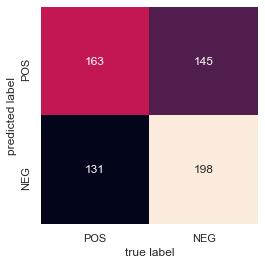

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
#評估決策樹模型好壞
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       294
           1       0.60      0.58      0.59       343

    accuracy                           0.57       637
   macro avg       0.57      0.57      0.57       637
weighted avg       0.57      0.57      0.57       637



# 隨機森林

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 跑迴圈數次，看最大可以跑多少
Training_Set_Score = []
Test_Set_Score = []
Confusion_Matrix = []
max_training_set_score = float()
max_test_set_score = float()
max_confusion_matrix = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # 套件功能把資料打散分為訓練集跟測試集
    
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
  
    # 記錄每次的結果,可以print出來看
    #Training_Set_Score.append(rfc.score(X_train,y_train))
    #Test_Set_Score.append(rfc.score(X_test,y_test))
    #Confusion_Matrix.append(confusion_matrix(y_test, rfc_pred))
    
    test_set_score = rfc.score(X_test,y_test)
    if test_set_score > max_test_set_score:
        max_test_set_score = test_set_score
        max_training_set_score = rfc.score(X_train,y_train)
        max_confusion_matrix = confusion_matrix(y_test, rfc_pred)
    

#print(Training_Set_Score)
#print(Test_Set_Score)
#print(Confusion_Matrix)

print('max_training_set_score:',max_training_set_score)
print('max_test_set_score:',max_test_set_score)
print(max_confusion_matrix)

max_training_set_score: 0.9937156323644933
max_test_set_score: 0.6656200941915228
[[186 118]
 [ 95 238]]


In [14]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

#預測測試組的駝背是否發生
rfc_pred = rfc.predict(X_test)

In [15]:
print('Training Set Score:',rfc.score(X_train,y_train))  # 訓練集成效
print('Test Set Score:',rfc.score(X_test,y_test))  # 測試集成效

Training Set Score: 0.9968578161822467
Test Set Score: 0.6232339089481946


Text(89.18, 0.5, 'predicted label')

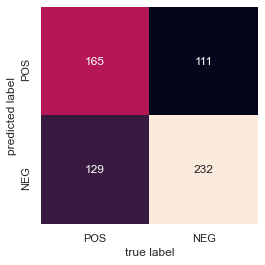

In [16]:
mat = confusion_matrix(y_test, rfc_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
#評估決策樹模型好壞
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       294
           1       0.64      0.68      0.66       343

    accuracy                           0.62       637
   macro avg       0.62      0.62      0.62       637
weighted avg       0.62      0.62      0.62       637

